In [315]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

In [316]:
# initial conditions
x1_0 = 0
x2_0 = 800
x0 = [x1_0,x2_0]

In [317]:
#Successional Sequence I Differential Equations
def odes_seqI(x, t):
    x1, x2 = x
    
    if t == 0:
        dx1dt = 0
        dx2dt = 0
    else:
        if t < 25:
            a10 = 0.006 #fixed
            a02 = 0.0125 
            a12 = 0.009
            a21 = 0.1 #fixed
        else:
            a10 = 0.006 #fixed
            a02 = 0.004
            a12 = 0.0188
            a21 = 0.1 #fixed

        dx1dt = a10 * x1 - a21 * x1 + a12 * x2
        dx2dt = 10 - a10 * x1 + a21 * x1 - a12 * x2 - a02 * x2

    return [dx1dt, dx2dt]

In [318]:
#Successional Sequence II Differential Equations
def odes_seqII(x, t):
    x1, x2 = x
    
    if t == 0:
        dx1dt = 0
        dx2dt = 0
    else:
        if t < 300:
            a10 = 0.0003 #fixed
            a02 = 0.0125 
            a12 = 0.0003
            a21 = 0.00035 #fixed
        else:
            a10 = 0.0003 #fixed
            a02 = 0.004 
            a12 = 0.0002
            a21 = 0.00035 #fixed

        dx1dt = a10 * x1 - a21 * x1 + a12 * x2
        dx2dt = 10 - a10 * x1 + a21 * x1 - a12 * x2 - a02 * x2

    return [dx1dt, dx2dt]

In [319]:
#Succession Sequence I - Table 2
# Add a large time point for evaluation
times_to_evaluate = [0, 1, 24, 100, 200, 400, 600, 1000, 10000]
evolution_stages = ['BG', 'ES1', 'ES2', 'ES3', 'MS1', 'MS2', 'MS3', 'LS', 'SS']

# Evaluate the solution at specific time points
x_evaluated = odeint(odes_seqI, x0, times_to_evaluate)

#Other values
dxdt=[]
z10=[]
z20=[]
f21=[]
f12=[]
y02=[]
a10 = 0.006
a21 = 0.1
for i in range (len(times_to_evaluate)):
    dxdt.append(odes_seqI(x_evaluated [i], times_to_evaluate[i]))
    if i==0:
        z10.append(0)
        z20.append(10)
        f21.append(0)
        f12.append(0)
        y02.append(10)
    else:
        if i<3:
            a02 = 0.0125
            a12 = 0.009
        else:
            a02 = 0.004
            a12 = 0.0188

        z10.append(a10*x_evaluated [i,0])
        z20.append(10-a10*x_evaluated [i,0])
        f21.append(a21*x_evaluated [i,0])
        f12.append(a12*x_evaluated [i,1])
        y02.append(a02*x_evaluated[i, 1])

In [320]:
# Creating a DataFrame _ top part of table 2
times_to_evaluate2 = [0, 1, 24, 100, 200, 400, 600, 1000, '']
data = {
    "Succession Stage": evolution_stages,
    "Time": times_to_evaluate2,
    "z10": [round(val, 2) for val in z10],
    "z20": [round(val, 2) for val in z20],
    "f21": [round(val, 2) for val in f21],
    "f12": [round(val, 2) for val in f12],
    "x1": [round(val, 2) for val in [x[0] for x in x_evaluated]],
    "x2": [round(val, 2) for val in [x[1] for x in x_evaluated]],
    "x1_dot": [round(val, 2) for val in [x[0] for x in dxdt]],
    "x2_dot": [round(val, 2) for val in [x[1] for x in dxdt]],
    "y02": [round(val, 2) for val in y02]
}

df = pd.DataFrame(data)

# Display the DataFrame
print("Top part of Table 2 (succession sequence I):")
print(df)

# Export to Excel
excel_filename = "result_data.xlsx"
df.to_excel(excel_filename, index=False)
print(f"\nData exported to {excel_filename}")

Top part of Table 2 (succession sequence I):
  Succession Stage  Time   z10    z20    f21    f12      x1       x2  x1_dot  \
0               BG     0  0.00  10.00   0.00   0.00    0.00   800.00    0.00   
1              ES1     1  0.04   9.96   0.68   7.14    6.84   793.20    6.50   
2              ES2    24  0.39   9.61   6.46   6.73   64.58   747.25    0.65   
3              ES3   100  1.24   8.76  20.67  20.41  206.73  1085.38    0.97   
4              MS1   200  1.74   8.26  28.94  27.91  289.44  1484.33    0.70   
5              MS2   400  2.35   7.65  39.15  37.16  391.46  1976.43    0.36   
6              MS3   600  2.66   7.34  44.40  41.93  444.05  2230.10    0.19   
7               LS  1000  2.91   7.09  48.51  45.65  485.13  2428.28    0.05   
8               SS        3.00   7.00  50.00  47.00  500.00  2500.00   -0.00   

   x2_dot    y02  
0    0.00  10.00  
1   -6.41   9.92  
2    0.00   9.34  
3    4.69   4.34  
4    3.37   5.94  
5    1.73   7.91  
6    0.89   8.92  
7 

In [321]:
#Creating input-output network
dx1dt_pos=[]
dx2dt_pos=[]
for i in range (len(times_to_evaluate)):
    if dxdt[i][0]>0:
        dx1dt_pos.append(dxdt[i][0])
    else:
        dx1dt_pos.append(0)
            
    if dxdt[i][1]>0:
        dx2dt_pos.append(dxdt[i][1])
    else:
        dx2dt_pos.append(0)
epsilon = 1e-10
I=np.identity(2,dtype='float64')
F=[]
T_i=[]
G=[]
N=[]
TST_I=[]
T_ck=[]
TST_c=[]
CI_I=[] #Cycling Index for Sequence I
ratio_of_output_to_input_I=[] #ratio of output to input for sequence I
APL_I = [] #Average Path Length
for i in range (len(times_to_evaluate)):
    F.append (np.array([[0, f12[i]], [f21[i], 0]]))
    T_i.append(np.sum(F[i], axis=0)+[0,y02[i]]+[dx1dt_pos[i],dx2dt_pos[i]])
    TST_I.append(np.sum(T_i[i], axis=0))
    G.append(F[i]/(T_i[i] + epsilon))
    N.append(np.linalg.inv(I-G[i]))
    T_ck.append([T_i[i][0]*(N[i][0,0]-1)/N[i][0,0] , T_i[i][1]*(N[i][1,1]-1)/N[i][1,1]])
    TST_c.append(np.sum(T_ck[i], axis=0))
    CI_I.append(TST_c[i]/TST_I[i])
    ratio_of_output_to_input_I.append(y02[i]/(z10[i]+z20[i]))
    APL_I.append (TST_I[i]/(z10[i]+z20[i]))

In [322]:
#Succession Sequence II - Table 2
# Add a large time point for evaluation
times_to_evaluate = [0, 40, 200, 500, 700, 4300, 20100, 49700, 1000000]
evolution_stages = ['BG', 'ES1', 'ES2', 'ES3', 'MS1', 'MS2', 'MS3', 'LS', 'SS']

# Evaluate the solution at specific time points
x_evaluated = odeint(odes_seqII, x0, times_to_evaluate)

#Other values
dxdt=[]
z10=[]
z20=[]
f21=[]
f12=[]
y02=[]
a10 = 0.0003
a21 = 0.00035
for i in range (len(times_to_evaluate)):
    dxdt.append(odes_seqII(x_evaluated [i], times_to_evaluate[i]))
    if i==0:
        z10.append(0)
        z20.append(10)
        f21.append(0)
        f12.append(0)
        y02.append(10)
    else:
        if i<3:
            a02 = 0.0125 
            a12 = 0.0003
        else:
            a02 = 0.004 
            a12 = 0.0002

        z10.append(a10*x_evaluated [i,0])
        z20.append(10-a10*x_evaluated [i,0])
        f21.append(a21*x_evaluated [i,0])
        f12.append(a12*x_evaluated [i,1])
        y02.append(a02*x_evaluated[i, 1])

In [323]:
# Creating a DataFrame, bottom part of table 2
times_to_evaluate2 = [0, 40, 200, 500, 700, 4300, 20100, 49700, '']
data = {
    "Succession Stage": evolution_stages,
    "Time": times_to_evaluate2,
    "z10": [round(val, 2) for val in z10],
    "z20": [round(val, 2) for val in z20],
    "f21": [round(val, 2) for val in f21],
    "f12": [round(val, 2) for val in f12],
    "x1": [round(val, 2) for val in [x[0] for x in x_evaluated]],
    "x2": [round(val, 2) for val in [x[1] for x in x_evaluated]],
    "x1_dot": [round(val, 2) for val in [x[0] for x in dxdt]],
    "x2_dot": [round(val, 2) for val in [x[1] for x in dxdt]],
    "y02": [round(val, 2) for val in y02]
}

df = pd.DataFrame(data)

# Display the DataFrame
print("Bottom part of Table 2 (succession sequence II):")
print(df)

# Export to Excel
excel_filename = "result_data2.xlsx"
df.to_excel(excel_filename, index=False)
print(f"\nData exported to {excel_filename}")

Bottom part of Table 2 (succession sequence II):
  Succession Stage   Time   z10    z20   f21   f12        x1       x2  x1_dot  \
0               BG      0  0.00  10.00  0.00  0.00      0.00   800.00    0.00   
1              ES1     40  0.00  10.00  0.00  0.24      9.54   792.49    0.24   
2              ES2    200  0.01   9.99  0.02  0.23     47.05   782.82    0.23   
3              ES3    500  0.04   9.96  0.04  0.34    121.27  1691.26    0.33   
4              MS1    700  0.06   9.94  0.07  0.42    196.29  2084.31    0.41   
5              MS2   4300  0.52   9.48  0.60  0.48   1727.88  2400.39    0.39   
6              MS3  20100  1.83   8.17  2.14  0.49   6100.14  2453.04    0.19   
7               LS  49700  2.71   7.29  3.17  0.50   9046.65  2488.52    0.05   
8               SS         3.00   7.00  3.50  0.50  10000.00  2500.00    0.00   

   x2_dot    y02  
0    0.00  10.00  
1   -0.14   9.91  
2   -0.02   9.79  
3    2.90   6.77  
4    1.26   8.34  
5    0.00   9.60  
6    0.

In [324]:
#Creating input-output network
dx1dt_pos=[]
dx2dt_pos=[]
for i in range (len(times_to_evaluate)):
    if dxdt[i][0]>0:
        dx1dt_pos.append(dxdt[i][0])
    else:
        dx1dt_pos.append(0)
            
    if dxdt[i][1]>0:
        dx2dt_pos.append(dxdt[i][1])
    else:
        dx2dt_pos.append(0)
epsilon = 1e-10
I=np.identity(2,dtype='float64')
F=[]
T_i=[]
G=[]
N=[]
TST_II=[]
T_ck=[]
TST_c=[]
CI_II=[] #Cycling Index for Sequence I
ratio_of_output_to_input_II=[] #ratio of output to input for sequence I
APL_II=[]
for i in range (len(times_to_evaluate)):
    F.append (np.array([[0, f12[i]], [f21[i], 0]]))
    T_i.append(np.sum(F[i], axis=0)+[0,y02[i]]+[dx1dt_pos[i],dx2dt_pos[i]])
    TST_II.append(np.sum(T_i[i], axis=0))
    G.append(F[i]/(T_i[i] + epsilon))
    N.append(np.linalg.inv(I-G[i]))
    T_ck.append([T_i[i][0]*(N[i][0,0]-1)/N[i][0,0] , T_i[i][1]*(N[i][1,1]-1)/N[i][1,1]])
    TST_c.append(np.sum(T_ck[i], axis=0))
    CI_II.append(TST_c[i]/TST_II[i])
    ratio_of_output_to_input_II.append(y02[i]/(z10[i]+z20[i]))
    APL_II.append (TST_II[i]/(z10[i]+z20[i]))

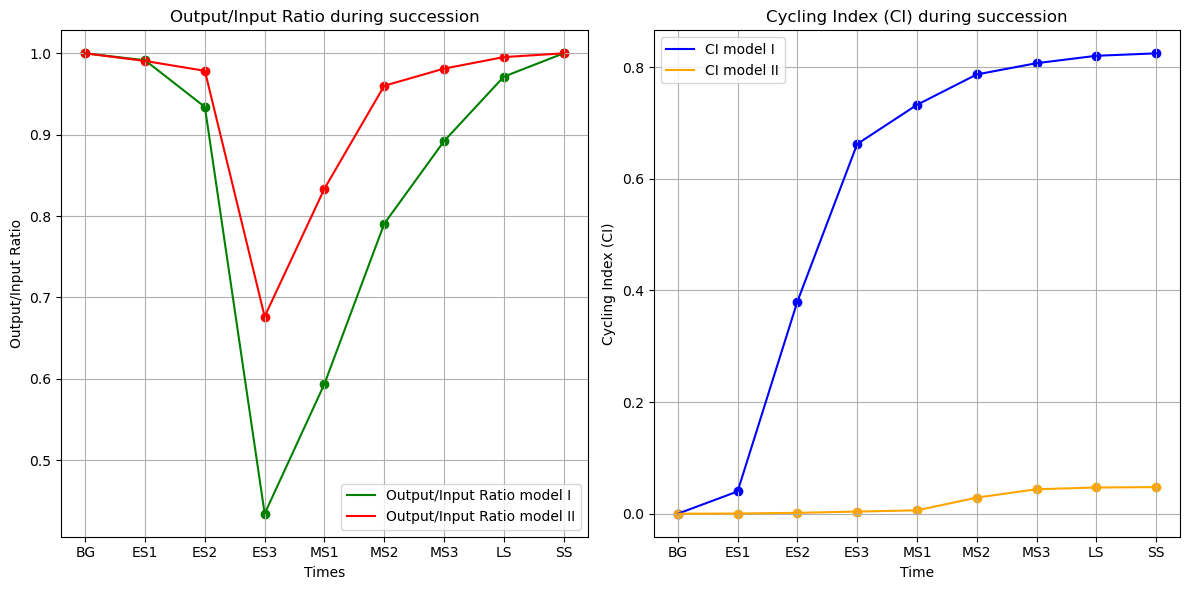

In [337]:
#Results (Fig 3)
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for CI_I and CI_II
ax1.plot(evolution_stages, CI_I, label='CI model I', color='blue')
ax1.plot(evolution_stages, CI_II, label='CI model II', color='orange')
ax1.scatter(evolution_stages, CI_I, color='blue')  # Data points for CI_I
ax1.scatter(evolution_stages, CI_II, color='orange')  # Data points for CI_II
ax1.set_xlabel('Time')
ax1.set_ylabel('Cycling Index (CI)')
ax1.set_title('Cycling Index (CI) during succession')
ax1.legend()
ax1.grid(True)

# Plot for ratio_input_I and ratio_input_II
ax2.plot(evolution_stages, ratio_of_output_to_input_I, label='Output/Input Ratio model I', color='green')
ax2.plot(evolution_stages, ratio_of_output_to_input_II, label='Output/Input Ratio model II', color='red')
ax2.scatter(evolution_stages, ratio_of_output_to_input_I, color='green')  # Data points for CI_I
ax2.scatter(evolution_stages, ratio_of_output_to_input_II, color='red')  # Data points for CI_II
ax2.set_xlabel('Times')
ax2.set_ylabel('Output/Input Ratio')
ax2.set_title('Output/Input Ratio during succession')
ax2.legend()
ax2.grid(True)

# Adjust layout for better spacing
plt.tight_layout()
fig.savefig('fig3_results.pdf')
plt.show()

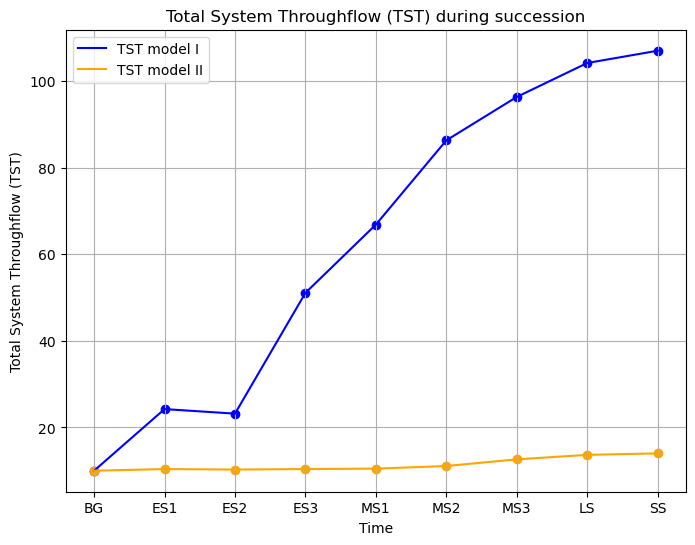

In [338]:
#Other network metrics
#TST
# Plotting
plt.figure(figsize=(8, 6))

plt.plot(evolution_stages, TST_I, label='TST model I', color='blue')
plt.scatter(evolution_stages, TST_I, color='blue')
plt.plot(evolution_stages, TST_II, label='TST model II', color='orange')
plt.scatter(evolution_stages, TST_II, color='orange')

plt.xlabel('Time')
plt.ylabel('Total System Throughflow (TST)')
plt.title('Total System Throughflow (TST) during succession')
plt.legend()
plt.grid(True)
plt.savefig('TST_plot.pdf')
plt.show()

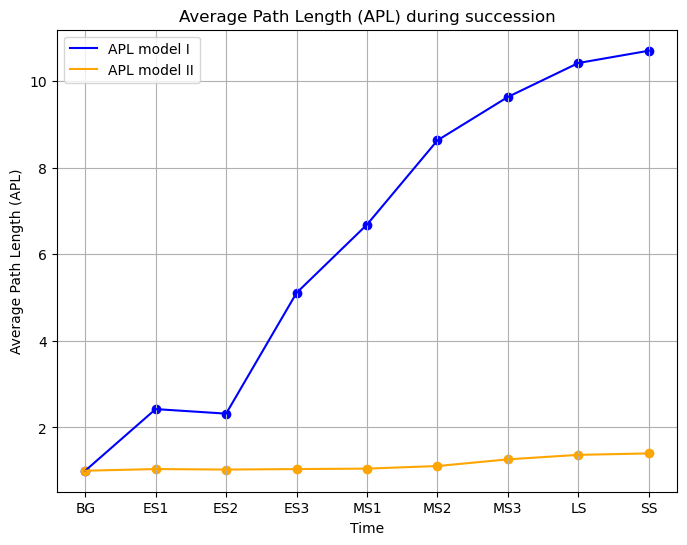

In [339]:
#Other network metrics
#TST
# Plotting
plt.figure(figsize=(8, 6))

plt.plot(evolution_stages, APL_I, label='APL model I', color='blue')
plt.scatter(evolution_stages, APL_I, color='blue')
plt.plot(evolution_stages, APL_II, label='APL model II', color='orange')
plt.scatter(evolution_stages, APL_II, color='orange')

plt.xlabel('Time')
plt.ylabel('Average Path Length (APL)')
plt.title('Average Path Length (APL) during succession')
plt.legend()
plt.grid(True)
plt.savefig('APL_plot.pdf')
plt.show()